### Finding the Best Paremeters for a Random Forest Classification Model for Diabetes Detection

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("Pima_Indian_Diabetes.csv")

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35,0.0,33.6,0.627,50.0,1
1,1.0,85,66.0,29,0.0,26.6,0.351,31.0,0
2,8.0,183,64.0,0,0.0,23.3,0.672,32.0,1
3,1.0,89,66.0,23,94.0,NaN,0.167,21.0,0
4,0.0,137,40.0,35,168.0,43.1,2.288,33.0,1
5,5.0,116,74.0,0,0.0,25.6,0.201,30.0,0
6,3.0,78,50.0,32,88.0,31.0,0.248,26.0,1
7,10.0,115,0.0,0,0.0,35.3,0.134,29.0,0
8,2.0,197,70.0,45,543.0,30.5,0.158,53.0,1
9,8.0,125,96.0,0,0.0,0.0,0.232,54.0,1


## Preprocessing

#### Values cannot be zero, except for the number of pregnancies.

In [8]:
print("number of rows with 0s in Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows with 0s in Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows with 0s in BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows with 0s in SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows with 0s in Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows with 0s in BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows with 0s in DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows with 0s in Age: {0}".format(len(df.loc[df['Age'] == 0])))

number of rows with 0s in Pregnancies: 111
number of rows with 0s in Glucose: 5
number of rows with 0s in BloodPressure: 35
number of rows with 0s in SkinThickness: 227
number of rows with 0s in Insulin: 373
number of rows with 0s in BMI: 11
number of rows with 0s in DiabetesPedigreeFunction: 0
number of rows with 0s in Age: 0


In [9]:
df.isnull().sum()

Pregnancies                 1
Glucose                     0
BloodPressure               2
SkinThickness               0
Insulin                     3
BMI                         3
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [11]:
print("number of rows with 0s in Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows with 0s in Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows with 0s in BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows with 0s in SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows with 0s in Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows with 0s in BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows with 0s in DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows with 0s in Age: {0}".format(len(df.loc[df['Age'] == 0])))

number of rows with 0s in Pregnancies: 111
number of rows with 0s in Glucose: 0
number of rows with 0s in BloodPressure: 0
number of rows with 0s in SkinThickness: 0
number of rows with 0s in Insulin: 0
number of rows with 0s in BMI: 0
number of rows with 0s in DiabetesPedigreeFunction: 0
number of rows with 0s in Age: 0


In [12]:
df.isnull().sum()

Pregnancies                   1
Glucose                       5
BloodPressure                37
SkinThickness               227
Insulin                     376
BMI                          14
DiabetesPedigreeFunction      1
Age                           1
Outcome                       0
dtype: int64

#### All relevent 0 values have successfully been replaced by NaN





### Inputing values:

In [13]:
imputer = KNNImputer(n_neighbors=5)

In [14]:
df_filled= pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [15]:
df_filled.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualising the data

#### The next table helps us understand statistical characteristics of the data, while the histograms help us visualise the spread in the count of each column. Since the histogram it is partitioned into brackets and plotted, it is possible visualise the data and understand it better compared to a scatter graph or distribution chart.



In [16]:
df_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.842448,3.367909,0.000,1.000,3.0000,6.00000,17.00
Glucose,768.0,121.598177,30.496543,44.000,99.000,117.0000,140.25000,199.00
BloodPressure,768.0,72.327344,12.195923,24.000,64.000,72.0000,80.00000,122.00
SkinThickness,768.0,29.109635,9.420725,7.000,23.000,29.0000,35.00000,99.00
Insulin,768.0,152.830990,98.631883,14.000,87.450,132.9000,189.45000,846.00
BMI,768.0,32.398359,6.894489,18.200,27.480,32.0000,36.52500,67.10
DiabetesPedigreeFunction,768.0,0.472065,0.331208,0.078,0.244,0.3725,0.62625,2.42
Age,768.0,33.207031,11.723347,21.000,24.000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.0000,1.00000,1.00


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

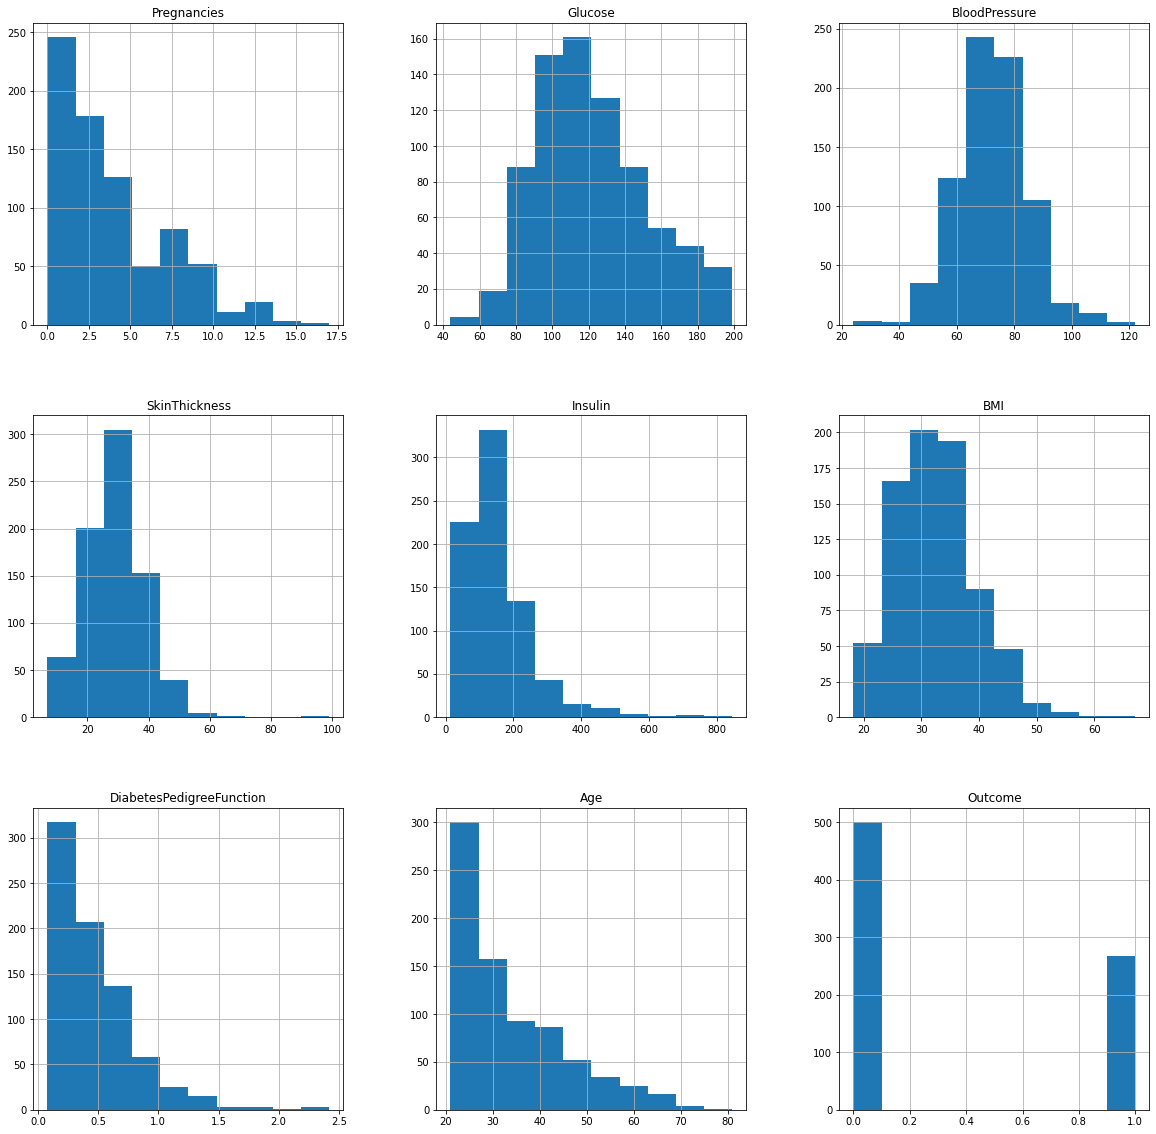

In [17]:
df_filled[df_filled.columns].hist(figsize=(20,20))

#### The next plots help us find visualise any obvious relation between any two attributes. For example, it is evident that when glucose rises, so does the insulin level. Also, as the bmi rises, so does the skin thickness. There is no obious evidence in the corelation of the outcome and any other attribute, though there seems to be some relation between glucose level and blood pressure with being diabetic. We can say this because of where the spread in the outcome graphs start. Further evaluation will be required to comment on this with certainity.



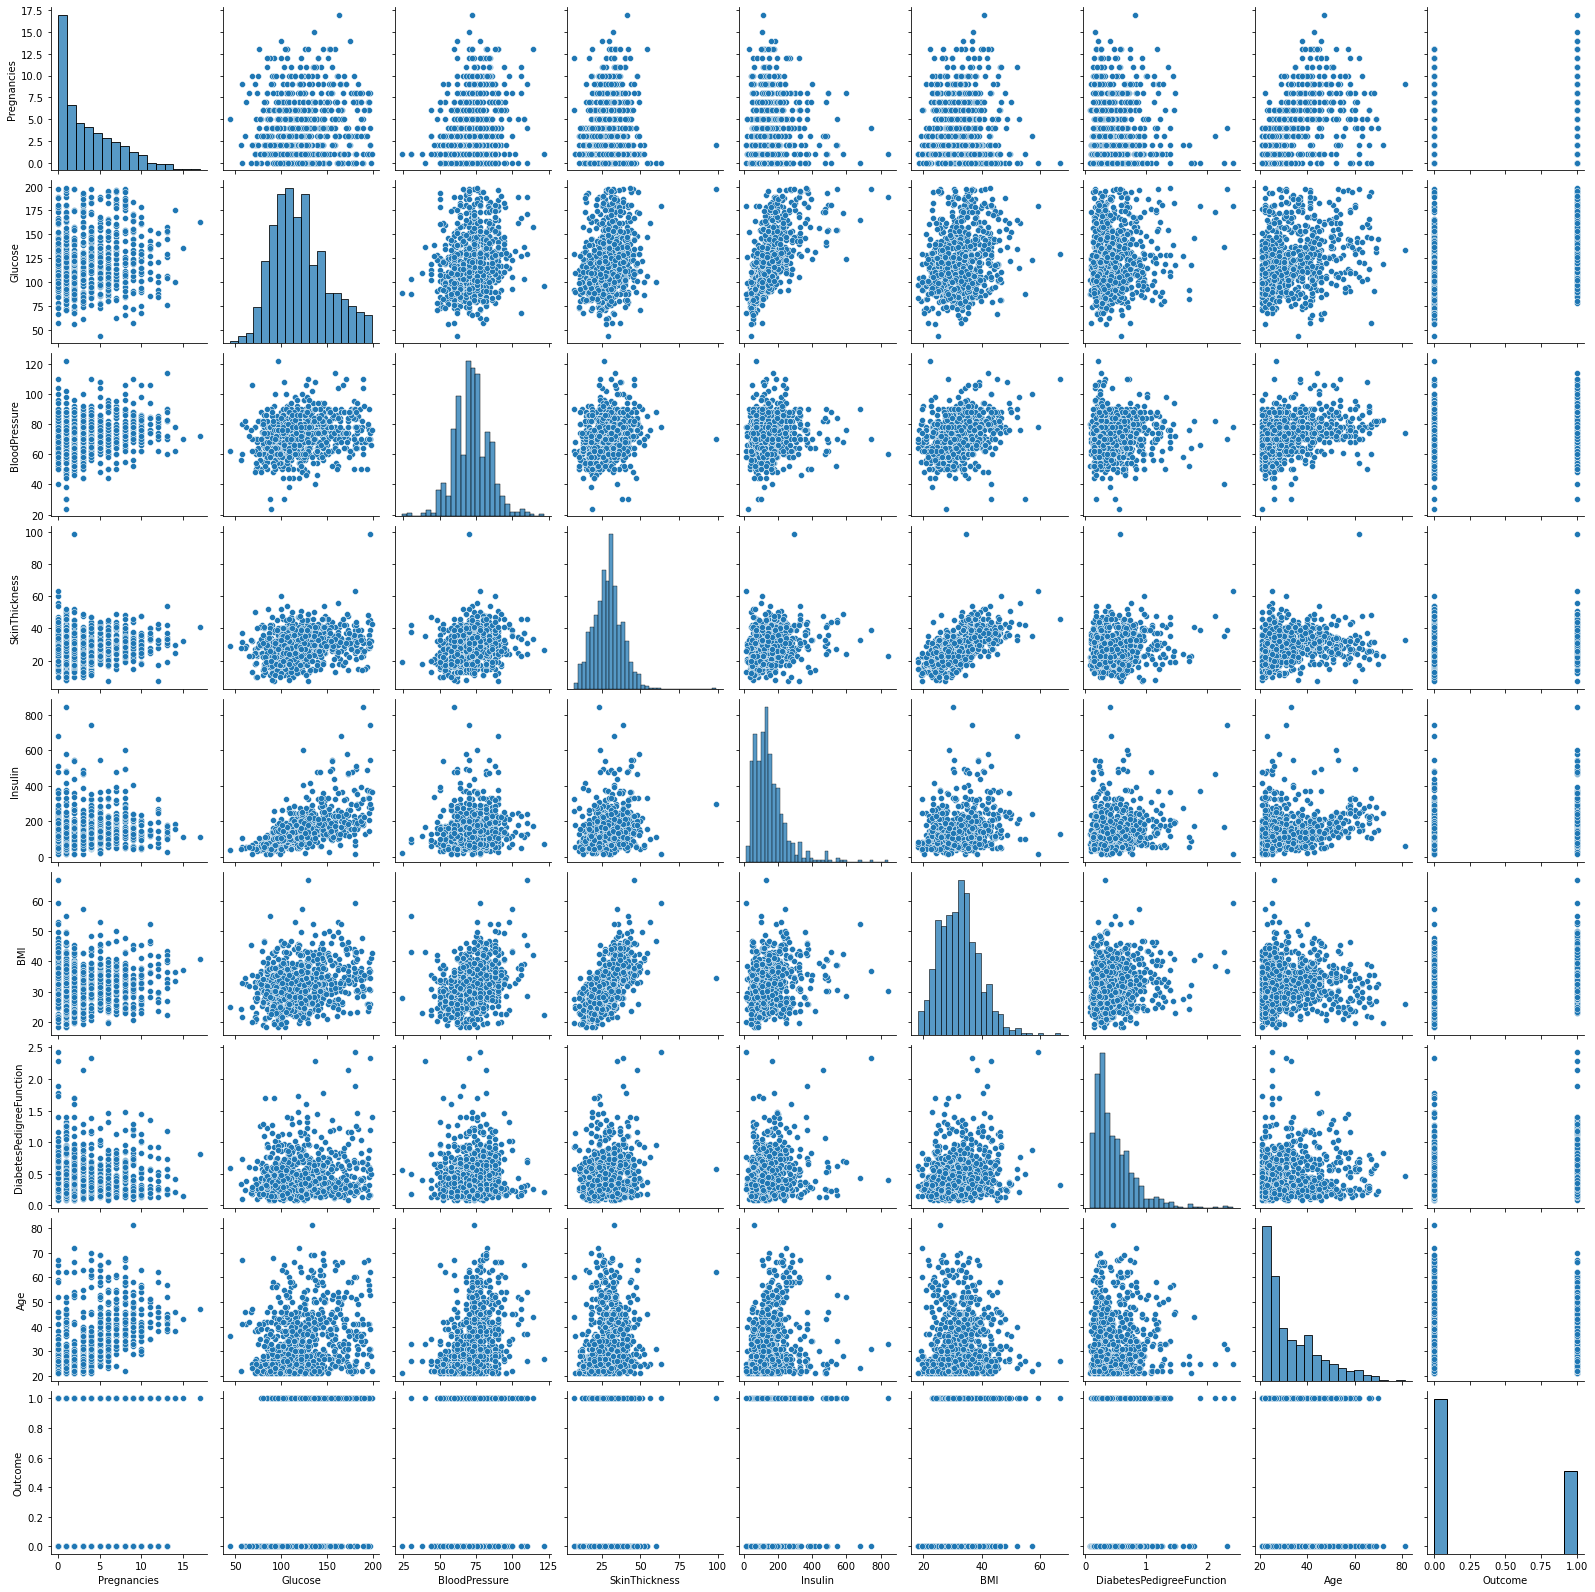

In [18]:
sns.pairplot(df_filled, kind="scatter")

#### The correlation table shows us the correlation value between each attriibute and the heatmap helps us visualise it. The values helps us understand how strongly two attriibutes are related. This solidifies my previous claim about the relationship between glucose with insulin, BMI with skin thickness, and outcome with glucose. While the relation is not very strong, it is considerably higher than other factors. The same cannot be said about my previous claim of the relationship between blood pressure and outcome. This might be because of the outliers. Further evaluation will be required to comment on this with certainty.

In [19]:
df_filled.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131666,0.217583,0.101607,0.056820,0.025948,-0.032677,0.548913,0.220951
Glucose,0.131666,1.000000,0.232652,0.246836,0.631377,0.241188,0.138722,0.264574,0.495853
BloodPressure,0.217583,0.232652,1.000000,0.229010,0.132166,0.297370,0.009641,0.342170,0.178027
SkinThickness,0.101607,0.246836,0.229010,1.000000,0.238230,0.641293,0.114082,0.151744,0.277636
Insulin,0.056820,0.631377,0.132166,0.238230,1.000000,0.250120,0.138865,0.208868,0.325946
BMI,0.025948,0.241188,0.297370,0.641293,0.250120,1.000000,0.153508,0.033207,0.313399
DiabetesPedigreeFunction,-0.032677,0.138722,0.009641,0.114082,0.138865,0.153508,1.000000,0.034071,0.173490
Age,0.548913,0.264574,0.342170,0.151744,0.208868,0.033207,0.034071,1.000000,0.235159
Outcome,0.220951,0.495853,0.178027,0.277636,0.325946,0.313399,0.173490,0.235159,1.000000


<AxesSubplot:>

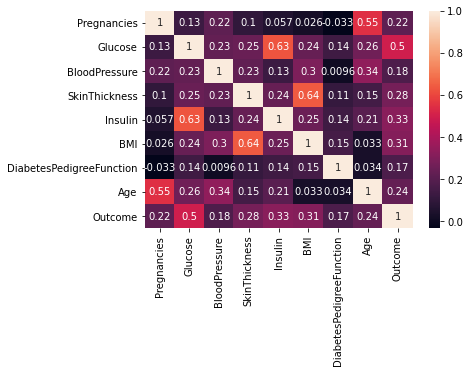

In [20]:
sns.heatmap(df_filled.corr(),annot=True)

### Making the model using random forests.

#### After research  and analysing potential models, I came to a conclusion that using random forests would be best, due to the accuracy. Since such a large number of values had to be imputated, I felt that compromising on computing for a better accuracy would be needed. 

#### I kept the n_estimaters to 40, since experimenting showed that the accuracy plateaued after this value. I then used the same value to make the comparison a fair test.

# Using gini, 30-70 split



In [21]:
# seperate features and label
X = df_filled[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_filled['Outcome']

# splitting the dataset into test and train data
X_train_g_30, X_test_g_30, y_train_g_30, y_test_g_30 = train_test_split(X, y, test_size=0.3)

# using gini as the criterion
clf_g_30 = RandomForestClassifier(n_estimators = 40,criterion='gini')
clf_g_30.fit(X_train_g_30, y_train_g_30)

RandomForestClassifier(n_estimators=40)

In [22]:
df_filled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,139.2,33.60,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.60,0.351,31.0,0.0
2,8.0,183.0,64.0,27.6,300.2,23.30,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,27.76,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.10,2.288,33.0,1.0


#### Here I am taking values at row 4. So the prediction, that the person has diabetes is true.

In [23]:
pred_g_30 = (clf_g_30.predict([[0,137,40,35,168,43.10,2.288,33]]))


if pred_g_30 == 0:
    print('The person does not have diabetes.')
else:
    print('The person has diabetes.')

The person has diabetes.


### Checking The viability of my model


In [24]:
clf_g_30.score(X_test_g_30, y_test_g_30)*100

73.16017316017316

#### The heat map helps us visualise the accuracy of the model with true and false positives and negatives. Majority of the predicted values match with actual value.

In [25]:
y_predicted_g_30 = clf_g_30.predict(X_test_g_30)

[[131  21]
 [ 41  38]]


Text(24.0, 0.5, 'Truth')

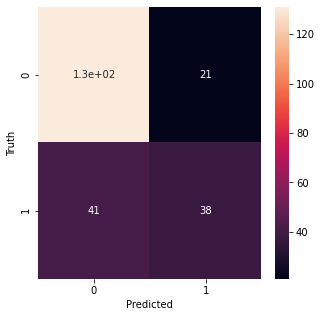

In [56]:
cm_g_30 = confusion_matrix(y_test_g_30, y_predicted_g_30)
print(cm_g_30)

plt.figure(figsize=(5,5))

sns.heatmap(cm_g_30, annot=True) 

plt.xlabel('Predicted')

plt.ylabel('Truth')

In [27]:
precision_g_30 = precision_score(y_test_g_30, y_predicted_g_30)
recall_g_30 = recall_score(y_test_g_30, y_predicted_g_30)
f1_g_30 = f1_score(y_test_g_30, y_predicted_g_30)

In [28]:
print("Precision: ", precision_g_30)
print("Recall: ", recall_g_30)
print("F1 Score: ", f1_g_30)

Precision:  0.6440677966101694
Recall:  0.4810126582278481
F1 Score:  0.5507246376811594


# Using gini , 40-60 split



In [29]:
# seperate features and label
X = df_filled[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_filled['Outcome']

# splitting the dataset into test and train data
X_train_g_40, X_test_g_40, y_train_g_40, y_test_g_40 = train_test_split(X, y, test_size=0.4)

# using gini as the criterion
clf_g_40 = RandomForestClassifier(n_estimators = 40,criterion='gini')
clf_g_40.fit(X_train_g_40, y_train_g_40)

RandomForestClassifier(n_estimators=40)

#### Here I am taking values at row 4. So the prediction, that the person has diabetes is true.

In [30]:
pred_g_40 = (clf_g_40.predict([[0,137,40,35,168,43.10,2.288,33]]))


if pred_g_40 == 0:
    print('The person does not have diabetes.')
else:
    print('The person has diabetes.')

The person has diabetes.


### Checking The viability of my model


In [31]:
clf_g_40.score(X_test_g_40, y_test_g_40)*100

75.0

#### The heat map helps us visualise the accuracy of the model with true and false positives and negatives. Majority of the predicted values match with actual value.

In [32]:
y_predicted_g_40 = clf_g_40.predict(X_test_g_40)

[[162  33]
 [ 44  69]]


Text(24.0, 0.5, 'Truth')

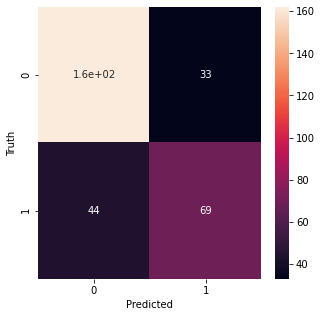

In [55]:
cm_g_40 = confusion_matrix(y_test_g_40, y_predicted_g_40)
print(cm_g_40)

plt.figure(figsize=(5,5))

sns.heatmap(cm_g_40, annot=True) 

plt.xlabel('Predicted')

plt.ylabel('Truth')

In [34]:
precision_g_40 = precision_score(y_test_g_40, y_predicted_g_40)
recall_g_40 = recall_score(y_test_g_40, y_predicted_g_40)
f1_g_40 = f1_score(y_test_g_40, y_predicted_g_40)

In [35]:
print("Precision: ", precision_g_40)
print("Recall: ", recall_g_40)
print("F1 Score: ", f1_g_40)

Precision:  0.6764705882352942
Recall:  0.6106194690265486
F1 Score:  0.641860465116279


# Using entropy, 30-70 split



In [36]:
# seperate features and label
X = df_filled[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_filled['Outcome']

# splitting the dataset into test and train data
X_train_e_30, X_test_e_30, y_train_e_30, y_test_e_30 = train_test_split(X, y, test_size=0.3)

# using entropy as the criterion
clf_e_30 = RandomForestClassifier(n_estimators = 40,criterion='entropy')
clf_e_30.fit(X_train_e_30, y_train_e_30)

RandomForestClassifier(criterion='entropy', n_estimators=40)

#### Here I am taking values at row 4. So the prediction, that the person has diabetes is true.

In [37]:
pred_e_30 = (clf_e_30.predict([[0,137,40,35,168,43.10,2.288,33]]))


if pred_e_30 == 0:
    print('The person does not have diabetes.')
else:
    print('The person has diabetes.')

The person has diabetes.


### Checking The viability of my model


In [38]:
clf_e_30.score(X_test_e_30, y_test_e_30)*100

75.75757575757575

#### The heat map helps us visualise the accuracy of the model with true and false positives and negatives. Majority of the predicted values match with actual value.

In [39]:
y_predicted_e_30 = clf_e_30.predict(X_test_e_30)

[[130  19]
 [ 37  45]]


Text(24.0, 0.5, 'Truth')

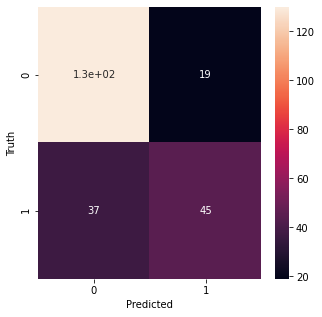

In [54]:
cm_e_30 = confusion_matrix(y_test_e_30, y_predicted_e_30)
print(cm_e_30)

plt.figure(figsize=(5,5))

sns.heatmap(cm_e_30, annot=True) 

plt.xlabel('Predicted')

plt.ylabel('Truth')

In [41]:
precision_e_30 = precision_score(y_test_e_30, y_predicted_e_30)
recall_e_30 = recall_score(y_test_e_30, y_predicted_e_30)
f1_e_30 = f1_score(y_test_e_30, y_predicted_e_30)

In [42]:
print("Precision: ", precision_e_30)
print("Recall: ", recall_e_30)
print("F1 Score: ", f1_e_30)

Precision:  0.703125
Recall:  0.5487804878048781
F1 Score:  0.6164383561643836


# Using entropy , 40-60 split



In [43]:
# seperate features and label
X = df_filled[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_filled['Outcome']

# splitting the dataset into test and train data
X_train_e_40, X_test_e_40, y_train_e_40, y_test_e_40 = train_test_split(X, y, test_size=0.4)

# using entropy as the criterion
clf_e_40 = RandomForestClassifier(n_estimators = 40,criterion='entropy')
clf_e_40.fit(X_train_e_40, y_train_e_40)

RandomForestClassifier(criterion='entropy', n_estimators=40)

#### Here I am taking values at row 4. So the prediction, that the person has diabetes is true.

In [44]:
pred_e_40 = (clf_e_40.predict([[0,137,40,35,168,43.10,2.288,33]]))


if pred_e_40 == 0:
    print('The person does not have diabetes.')
else:
    print('The person has diabetes.')

The person has diabetes.


### Checking The viability of my model


In [45]:
clf_e_40.score(X_test_e_40, y_test_e_40)*100

77.27272727272727

#### The heat map helps us visualise the accuracy of the model with true and false positives and negatives. Majority of the predicted values match with actual value.

In [46]:
y_predicted_e_40 = clf_e_40.predict(X_test_e_40)

[[171  26]
 [ 44  67]]


Text(24.0, 0.5, 'Truth')

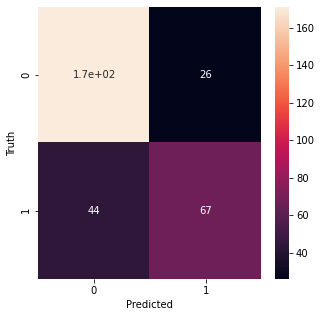

In [53]:
cm_e_40 = confusion_matrix(y_test_e_40, y_predicted_e_40)
print(cm_e_40)

plt.figure(figsize=(5,5))

sns.heatmap(cm_e_40, annot=True) 

plt.xlabel('Predicted')

plt.ylabel('Truth')

In [48]:
precision_e_40 = precision_score(y_test_e_40, y_predicted_e_40)
recall_e_40 = recall_score(y_test_e_40, y_predicted_e_40)
f1_e_40 = f1_score(y_test_e_40, y_predicted_e_40)

In [49]:
print("Precision: ", precision_e_40)
print("Recall: ", recall_e_40)
print("F1 Score: ",f1_e_40)

Precision:  0.7204301075268817
Recall:  0.6036036036036037
F1 Score:  0.6568627450980393


In [50]:
from tabulate import tabulate

In [51]:
table = [['Criterion','Split', 'Precison', 'Recall', 'F1 Score'],
        ['Gini', '30-70',precision_g_30, recall_g_30, f1_g_30],
        ['Gini', '40-60',precision_g_40, recall_g_40, f1_g_40],
        ['Entropy', '30-70',precision_e_30, recall_e_30, f1_e_30],
        ['Entropy', '40-60',precision_e_40, recall_e_40, f1_e_40]]

In [58]:
print(tabulate(table, headers = 'firstrow', tablefmt='fancy_grid'))

╒═════════════╤═════════╤════════════╤══════════╤════════════╕
│ Criterion   │ Split   │   Precison │   Recall │   F1 Score │
╞═════════════╪═════════╪════════════╪══════════╪════════════╡
│ Gini        │ 30-70   │   0.644068 │ 0.481013 │   0.550725 │
├─────────────┼─────────┼────────────┼──────────┼────────────┤
│ Gini        │ 40-60   │   0.676471 │ 0.610619 │   0.64186  │
├─────────────┼─────────┼────────────┼──────────┼────────────┤
│ Entropy     │ 30-70   │   0.703125 │ 0.54878  │   0.616438 │
├─────────────┼─────────┼────────────┼──────────┼────────────┤
│ Entropy     │ 40-60   │   0.72043  │ 0.603604 │   0.656863 │
╘═════════════╧═════════╧════════════╧══════════╧════════════╛


## Conclusion:

I used random forest, with two criterion, entropy and gini, with different test splits of 30-70 and 40-60 for each. The results, after calculating the precision, recall and F1 score, it is found that entropy gave better results than gini, and that the split of 40-60 also yieled higher scores than the 30-70 split for all the performance parameters. These insights helped me decide that the best random forest classification for this dataset would be with using entropy as the critereon and a split of 40-60.